# Loan Case Study

### AIM : 
This case study helps to identify defaulter and repayer for loan applicant by observing various factors from data recieves by banks. which can detriment the banks in two ways such as loss in business due to defaulters which are not able to repay the loan and deserving applicant who was able to repay the loan but due to bank's misinterpretation, bank is unable to give them loan.  

## Task 1 : Importing python packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [2]:
# display setting for max columns to have more clearity on data
pd.set_option('display.max_columns',None)

## Task 2 : Reading and Inspecting Data

In [3]:
application = pd.read_csv('/Users/momin/Downloads/datasets/application_data.csv')
previous = pd.read_csv('/Users/momin/Downloads/datasets/previous_application.csv')

### Subtask 2.1 : Application Data

In [4]:
application.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
application.shape

(307511, 122)

- application dataset has 307511 columns and 122 rows
- columns which starts with flag name such as Flag_phone contains boolean 0(No) ,1(yes). if client is not giving enough information, they may become defaulters.

### Subtask 2.1.1 :  Cleaning and filtering application dataset

- Finding null percentage more than 50%. 
- Removing these columns

In [6]:
nullcol = application.isnull().sum(axis = 0).sort_values(ascending = False)
nullcolper = pd.DataFrame(round((nullcol/len(application)*100),2)).reset_index()
nullcolper.columns=['column name','null %']
nullcolper['value'] = np.where(nullcolper['null %']> 50,'Yes','No')
nullbool = nullcolper[nullcolper['value']=='Yes']
null1 = nullcolper[nullcolper['value']=='Yes']

In [7]:
nullcolper

,column name,null %,value
0,COMMONAREA_MEDI,69.87,Yes
1,COMMONAREA_AVG,69.87,Yes
2,COMMONAREA_MODE,69.87,Yes
3,NONLIVINGAPARTMENTS_MODE,69.43,Yes
4,NONLIVINGAPARTMENTS_AVG,69.43,Yes
...,...,...,...
117,NAME_HOUSING_TYPE,0.00,No
118,NAME_FAMILY_STATUS,0.00,No
119,NAME_EDUCATION_TYPE,0.00,No
120,NAME_INCOME_TYPE,0.00,No


In [8]:
nullcolper['null %'].describe()

count    122.000000
mean      24.395902
std       28.446741
min        0.000000
25%        0.000000
50%        0.330000
75%       50.817500
max       69.870000
Name: null %, dtype: float64

In [9]:
null1['null %'].count()

41

- there are 41 columns with more than 50% of null values
- Now, i will remove these columns from dataset (application data) as there are more than 50% of null values which makes no sense to analyze
- I will later remove cols with more than 25% of null values as 24% is the mean and we dont required that much amount of null value percentage. 

In [10]:
application.drop(columns = ['COMMONAREA_MEDI','COMMONAREA_AVG',
'COMMONAREA_MODE',
'NONLIVINGAPARTMENTS_MODE',
'NONLIVINGAPARTMENTS_AVG',
'NONLIVINGAPARTMENTS_MEDI',
'FONDKAPREMONT_MODE',
'LIVINGAPARTMENTS_MODE',
'LIVINGAPARTMENTS_AVG',
'LIVINGAPARTMENTS_MEDI',
'FLOORSMIN_AVG',
'FLOORSMIN_MODE',
'FLOORSMIN_MEDI',
'YEARS_BUILD_MEDI',
'YEARS_BUILD_MODE',
'YEARS_BUILD_AVG',
'OWN_CAR_AGE',
'LANDAREA_MEDI',
'LANDAREA_MODE',
'LANDAREA_AVG',
'BASEMENTAREA_MEDI',
'BASEMENTAREA_AVG',
'BASEMENTAREA_MODE',       
'YEARS_BUILD_MEDI',
'YEARS_BUILD_MODE',
'YEARS_BUILD_AVG',
'OWN_CAR_AGE',
'LANDAREA_MEDI',
'LANDAREA_MODE',
'LANDAREA_AVG',
'BASEMENTAREA_MEDI',
'BASEMENTAREA_AVG',
'BASEMENTAREA_MODE',
'EXT_SOURCE_1',
'NONLIVINGAREA_MODE',
'NONLIVINGAREA_AVG',
'NONLIVINGAREA_MEDI',
'ELEVATORS_MEDI',
'ELEVATORS_AVG',
'ELEVATORS_MODE',
'WALLSMATERIAL_MODE',
'APARTMENTS_MEDI',
'APARTMENTS_AVG',
'APARTMENTS_MODE',
'ENTRANCES_MEDI',
'ENTRANCES_AVG',
'ENTRANCES_MODE',
'LIVINGAREA_AVG',
'LIVINGAREA_MODE',
'LIVINGAREA_MEDI',
'HOUSETYPE_MODE',
         ],inplace = True)

In [11]:
application.shape

(307511, 81)

- 41 columns with null value more than 50% are removed

- Finding null percentage more than 15%. 


In [12]:
nullcol = application.isnull().sum(axis = 0).sort_values(ascending = False)
nullcolper = pd.DataFrame(round((nullcol/len(application)*100),2)).reset_index()
nullcolper.columns=['column name','null %']
nullcolper['value'] = np.where(nullcolper['null %']> 15,'Yes','No')
null = nullcolper[nullcolper['value']=='Yes']

In [13]:
null

,column name,null %,value
0,FLOORSMAX_AVG,49.76,Yes
1,FLOORSMAX_MODE,49.76,Yes
2,FLOORSMAX_MEDI,49.76,Yes
3,YEARS_BEGINEXPLUATATION_AVG,48.78,Yes
4,YEARS_BEGINEXPLUATATION_MODE,48.78,Yes
5,YEARS_BEGINEXPLUATATION_MEDI,48.78,Yes
6,TOTALAREA_MODE,48.27,Yes
7,EMERGENCYSTATE_MODE,47.40,Yes
8,OCCUPATION_TYPE,31.35,Yes
9,EXT_SOURCE_3,19.83,Yes


- there are 10 cols more than 15% of null values so we will remove these to have more clearity on data
- we will check if there is some correlation between target and these columns.
- removing all columns except occupation type and ext_source3

<AxesSubplot:>

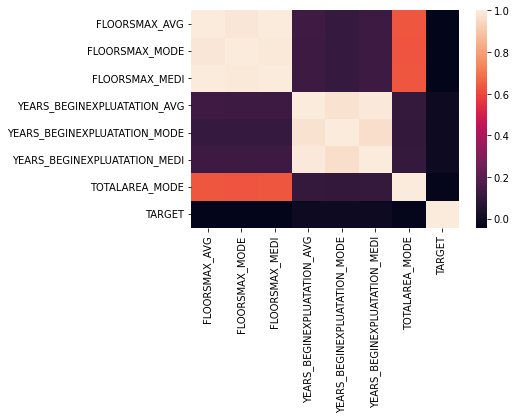

In [14]:
extracol = ['FLOORSMAX_AVG','FLOORSMAX_MODE','FLOORSMAX_MEDI','YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE']
sns.heatmap(application[extracol +['TARGET']].corr(),annot = False)

- As there is no correlation between Target and these columns will remove these columns.
- removing all columns except occupation type and ext_source3

In [15]:
application.drop(columns = ['FLOORSMAX_AVG',
'FLOORSMAX_MODE',
'FLOORSMAX_MEDI',
'YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BEGINEXPLUATATION_MEDI',
'TOTALAREA_MODE',
'EMERGENCYSTATE_MODE'],inplace = True)

In [16]:
application.shape

(307511, 73)

- Now only 73 columns are left

In [17]:
(application.isnull().sum().sort_values(ascending  =False)/len(application))*100

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
                                 ...    
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
TARGET                          0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
Length: 73, dtype: float64

- we will leave these columns as it we will now go on previous dataset

### Subtask 2.2 : Previous Dataset

In [18]:
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
previous.shape

(1670214, 37)

- There are 37 columns and 1670214 rows in previous dataset.
- it contains previous client details.
- some columns are matching with application dataset (AMT_ANNUITY,AMT_CREDIT,  AMT_GOODS_PRICE,  HOUR_APPR_PROCESS_START,  NAME_CONTRACT_TYPE,  NAME_TYPE_SUITE,  SK_ID_CURR,  WEEKDAY_APPR_PROCESS_START)

### Subtask 2.2.1 : Cleaning and filtering Previous dataset

In [20]:
nullcol2 = previous.isnull().sum(axis = 0).sort_values(ascending = False)
nullcolper2 = pd.DataFrame(round((nullcol2/len(previous)*100),2)).reset_index()
nullcolper2.columns=['column name','null %']
nullcolper2['value'] = np.where(nullcolper2['null %']> 50,'Yes','No')
nullbool2 = nullcolper2[nullcolper2['value']=='Yes']
null2 = nullcolper2[nullcolper2['value']=='Yes']

In [21]:
null2

,column name,null %,value
0,RATE_INTEREST_PRIVILEGED,99.64,Yes
1,RATE_INTEREST_PRIMARY,99.64,Yes
2,AMT_DOWN_PAYMENT,53.64,Yes
3,RATE_DOWN_PAYMENT,53.64,Yes


- There are two columns with 99.64% which shows that they bearly have values. these columns can be dropped.
- We will keep other columns as it is, will use them during analysis.

In [22]:
previous.drop(columns = ['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY'],inplace = True )

In [23]:
previous.shape

(1670214, 35)

## Task 3 : Data Analysis

### Subtask 3.1 : Finding Data Imbalance

In [24]:
repayers = application[application['TARGET']==0]
defaulters = application[application['TARGET']==1]

In [25]:
DefaulterPercent = round((len(defaulters)/len(application)*100),2)
RepayersPercent = round((len(repayers)/len(application)*100),2)

In [26]:
print(DefaulterPercent)
print(RepayersPercent)

8.07
91.93


- Data is highly imbalanced as there are only 8% defaulters
- defaulter : repayers = 8 : 92

### Subtask 3.2  : Finding outliers using box plot

- for ease i will seperate application data into segments

In [27]:
application.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [28]:
#random columns
randomCol = ['CODE_GENDER','CNT_CHILDREN','OCCUPATION_TYPE','CNT_FAM_MEMBERS','ORGANIZATION_TYPE']

In [29]:
#columns contains names
nameCol = ['NAME_CONTRACT_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']

In [30]:
#amount contains amount of loan, salary, annuity, etc.
amountCol = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

In [31]:
#columns contains flag (yes or no)
flag = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',]

In [32]:
list(enumerate(amountCol))

[(0, 'AMT_INCOME_TOTAL'),
 (1, 'AMT_CREDIT'),
 (2, 'AMT_ANNUITY'),
 (3, 'AMT_GOODS_PRICE'),
 (4, 'AMT_REQ_CREDIT_BUREAU_HOUR'),
 (5, 'AMT_REQ_CREDIT_BUREAU_DAY'),
 (6, 'AMT_REQ_CREDIT_BUREAU_WEEK'),
 (7, 'AMT_REQ_CREDIT_BUREAU_MON'),
 (8, 'AMT_REQ_CREDIT_BUREAU_QRT'),
 (9, 'AMT_REQ_CREDIT_BUREAU_YEAR')]

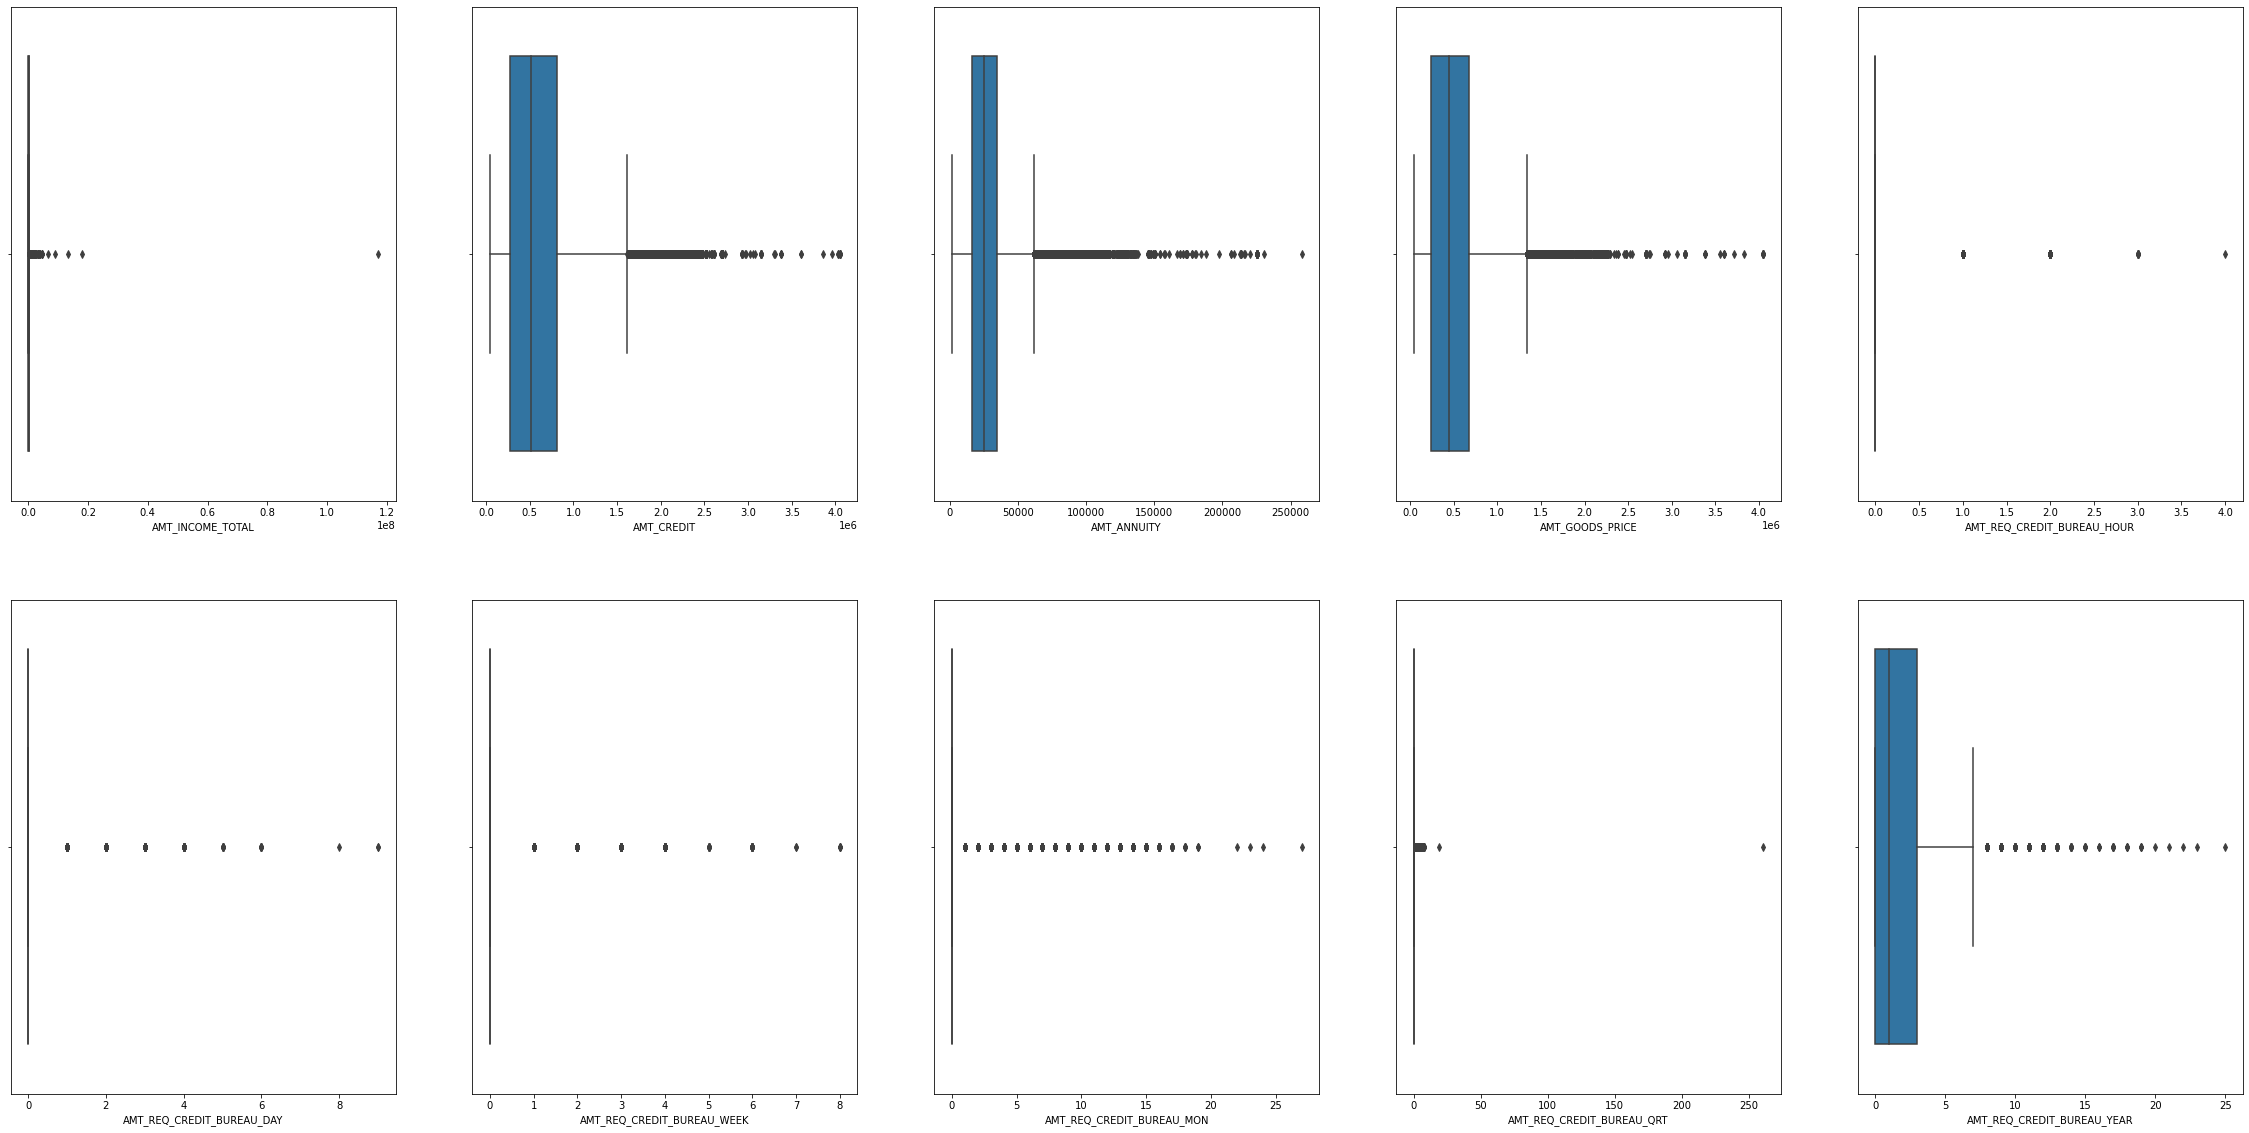

In [33]:
plt.figure(figsize= (40,20))
for i in enumerate(amountCol):
    plt.subplot(2,5,i[0]+1)
    sns.boxplot(i[1],data = application)

- Columns such as AMT_CREDIT ,AMT_ANNUITY,AMT_GOOD_PRICE contains large number of outliers.
- as the columns are continous we will use median to impute values

In [34]:
#AMT_CREDIT COLUMN
Q1 = np.quantile(application['AMT_CREDIT'], 0.25)
Q3 = np.quantile(application['AMT_CREDIT'], 0.75)
IQR = Q3 - Q1
UL = Q3 + (1.5*IQR)
LL = Q1 - (1.5*IQR)
print("The Q1 value is:", Q1)
print("The Q3 value is:", Q3)
print("The IQR value is:", IQR)
print("The upper limit value is:", UL)
print("The lower limit value is:", LL)
amt_credit_outliers = application['AMT_CREDIT'][application['AMT_CREDIT'] > UL].count()
print('outlier percentage ---',round((amt_credit_outliers/len(application['AMT_CREDIT']))*100),'%')

The Q1 value is: 270000.0
The Q3 value is: 808650.0
The IQR value is: 538650.0
The upper limit value is: 1616625.0
The lower limit value is: -537975.0
outlier percentage --- 2 %


- col AMT_CREDIT contains less than 5% outliers. we can use median or we can keep it as it is

In [35]:
application['AMT_ANNUITY'].fillna(value = application['AMT_ANNUITY'].mean() ,inplace = True)
application['AMT_ANNUITY'].isnull().sum()

0

In [36]:
#AMT_ANNUITY COLUMN
Q1 = np.quantile(application['AMT_ANNUITY'], 0.25)
Q3 = np.quantile(application['AMT_ANNUITY'], 0.75)
IQR = Q3 - Q1
UL = Q3 + (1.5*IQR)
LL = Q1 - (1.5*IQR)
print("The Q1 value is:", Q1)
print("The Q3 value is:", Q3)
print("The IQR value is:", IQR)
print("The upper limit value is:", UL)
print("The lower limit value is:", LL)
amt_annuity_outliers = application['AMT_ANNUITY'][application['AMT_ANNUITY'] > UL].count()
print('outlier percentage ---',round((amt_annuity_outliers/len(application['AMT_ANNUITY']))*100),'%')

The Q1 value is: 16524.0
The Q3 value is: 34596.0
The IQR value is: 18072.0
The upper limit value is: 61704.0
The lower limit value is: -10584.0
outlier percentage --- 2 %



- col AMT_ANNUITY contains less than 5% outliers. we can use median or we can keep it as it is

In [37]:
application['AMT_GOODS_PRICE'].fillna(value = application['AMT_GOODS_PRICE'].mean() ,inplace = True)
application['AMT_GOODS_PRICE'].isnull().sum()

0

In [38]:
#AMT_GOODS_PRICE COLUMN
Q1 = np.quantile(application['AMT_GOODS_PRICE'], 0.25)
Q3 = np.quantile(application['AMT_GOODS_PRICE'], 0.75)
IQR = Q3 - Q1
UL = Q3 + (1.5*IQR)
LL = Q1 - (1.5*IQR)
print("The Q1 value is:", Q1)
print("The Q3 value is:", Q3)
print("The IQR value is:", IQR)
print("The upper limit value is:", UL)
print("The lower limit value is:", LL)
amt_goods_price_outliers = application['AMT_GOODS_PRICE'][application['AMT_GOODS_PRICE'] > UL].count()
print('Outlier percentage --',round((amt_goods_price_outliers/len(application['AMT_GOODS_PRICE']))*100),'%')

The Q1 value is: 238500.0
The Q3 value is: 679500.0
The IQR value is: 441000.0
The upper limit value is: 1341000.0
The lower limit value is: -423000.0
Outlier percentage -- 5 %


- col AMT_ANNUITY contains 5% outliers. we can use median or we can keep it as it is

### Subtask 3.3 : Analysis on Application dataset

In [39]:
# variable list containing only categorical variables
var_cat = pd.DataFrame(['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'])

In [40]:
# variable list containing only numerical variables
var_num = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS']

### Subtask 3.3.1 : Univariate categorical analysis

- CODE GENDER

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

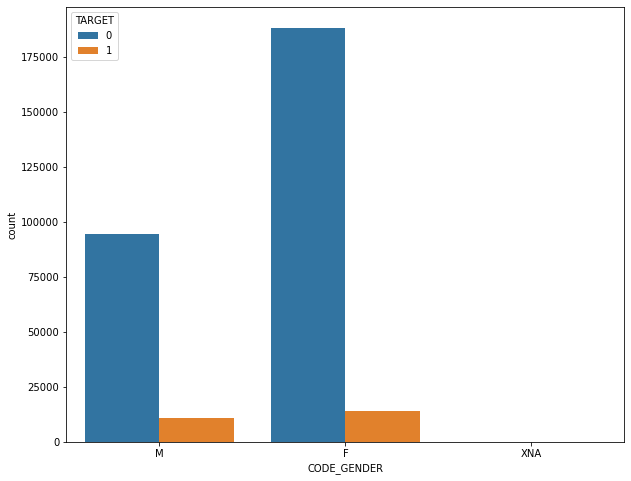

In [41]:
plt.figure(figsize = (10,8) )
sns.countplot(application['CODE_GENDER'],hue = application['TARGET'])

In [42]:
a = pd.DataFrame(application['TARGET'])
a['Gen'] = pd.DataFrame(application['CODE_GENDER'])
b2 = a[a['TARGET']==1]
defaulterMale = b2[b2['Gen']== 'M']
defaulterFemale = b2[b2['Gen']=='F']
print('Percentage of defaulter Male : ',round((len(defaulterMale)/len(b2))*100),'%')
print('Percentage of defaulter Female : ',round((len(defaulterFemale)/len(b2))*100),'%')

Percentage of defaulter Male :  43 %
Percentage of defaulter Female :  57 %


- application dataset contains more number of female defaulters than male. 
- as female application count is almost double than female , hence more chance of defaluting. 

- EDUCATION TYPE

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

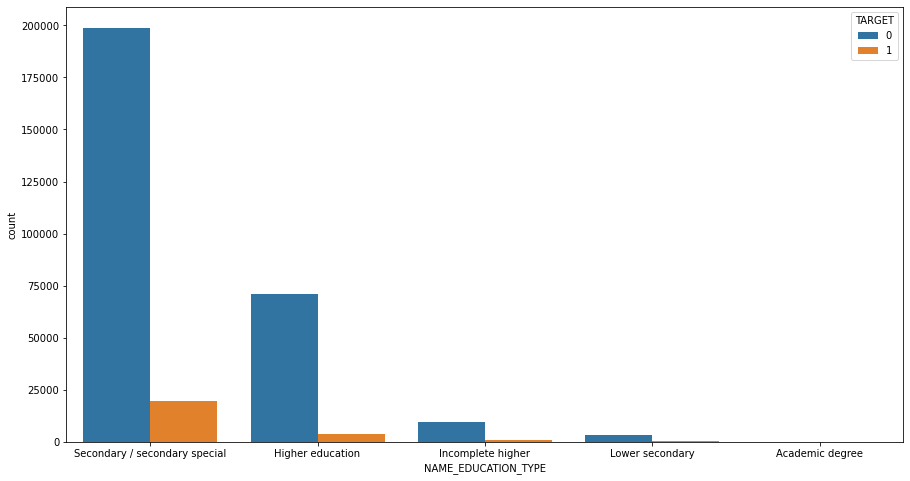

In [43]:
plt.figure(figsize = (15,8) )
sns.countplot(application['NAME_EDUCATION_TYPE'],hue = application['TARGET'])

In [44]:
a = pd.DataFrame(application['TARGET'])
a['EDU'] = pd.DataFrame(application['NAME_EDUCATION_TYPE'])
b2 = a[a['TARGET']==1]
defaulterSec = b2[b2['EDU']== 'Secondary / secondary special']
defaulterHigh = b2[b2['EDU']=='Higher education']
defaulterIHigh = b2[b2['EDU']=='Incomplete higher']
defaulterlsec = b2[b2['EDU']=='Lower secondary']
defaulterAD = b2[b2['EDU']=='Academic degree']

print('Percentage of defaulter Secondary special : ',round((len(defaulterSec)/len(b2))*100),'%')
print('Percentage of defaulter Higher education : ',round((len(defaulterHigh)/len(b2))*100),'%')
print('Percentage of defaulter Incomplete higher : ',round((len(defaulterIHigh)/len(b2))*100),'%')
print('Percentage of defaulter Lower secondary : ',round((len(defaulterlsec)/len(b2))*100),'%')
print('Percentage of defaulter Academic degree : ',round((len(defaulterAD)/len(b2))*100),'%')

Percentage of defaulter Secondary special :  79 %
Percentage of defaulter Higher education :  16 %
Percentage of defaulter Incomplete higher :  4 %
Percentage of defaulter Lower secondary :  2 %
Percentage of defaulter Academic degree :  0 %


- Secondary / secondary special has almost 80% of defaluters.

- CONTRACT TYPE

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

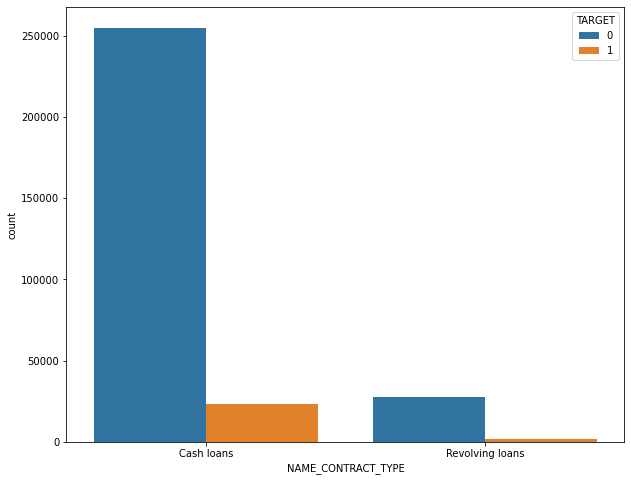

In [45]:
plt.figure(figsize = (10,8) )
sns.countplot(application['NAME_CONTRACT_TYPE'],hue = application['TARGET'])

In [46]:
a = pd.DataFrame(application['TARGET'])
a['Con'] = pd.DataFrame(application['NAME_CONTRACT_TYPE'])
b2 = a[a['TARGET']==1]
defaulterCl = b2[b2['Con']== 'Cash loans']
defaulterRL = b2[b2['Con']=='Revolving loans']
print('Percentage of defaulter in Cash loans : ',round((len(defaulterCl)/len(b2))*100),'%')
print('Percentage of defaulter in Revolving loan : ',round((len(defaulterRL)/len(b2))*100),'%')

Percentage of defaulter in Cash loans :  94 %
Percentage of defaulter in Revolving loan :  6 %


- cash loans has more % of defaulters, results due to more number of application.

- INCOME TYPE

<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='count'>

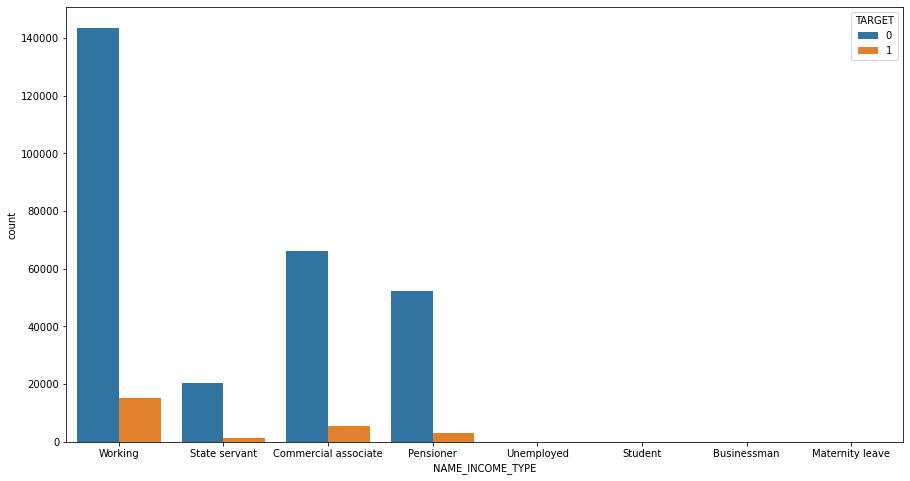

In [47]:
plt.figure(figsize = (15,8) )
sns.countplot(application['NAME_INCOME_TYPE'],hue = application['TARGET'])

In [48]:
a = pd.DataFrame(application['TARGET'])
a['INC'] = pd.DataFrame(application['NAME_INCOME_TYPE'])
b2 = a[a['TARGET']==1]
defaulterWorking = b2[b2['INC']== 'Working']
defaulterStateServant = b2[b2['INC']=='State servant']
defaulterICommercial_associate = b2[b2['INC']=='Commercial associate']
defaulterPensioner = b2[b2['INC']=='Pensioner']
defaulterUnemployed = b2[b2['INC']=='Unemployed']
defaulterStudent = b2[b2['INC']=='Student']
defaulterBusinessman = b2[b2['INC']=='Businessman']
defaulterMaternity_leave = b2[b2['INC']=='Maternity leave']

print('Percentage of defaulter Working : ',round((len(defaulterWorking)/len(b2))*100),'%')
print('Percentage of defaulter State servant : ',round((len(defaulterStateServant)/len(b2))*100),'%')
print('Percentage of defaulter Commercial associate : ',round((len(defaulterICommercial_associate)/len(b2))*100),'%')
print('Percentage of defaulter Pensioner : ',round((len(defaulterPensioner)/len(b2))*100),'%')
print('Percentage of defaulter Unemployed : ',round((len(defaulterUnemployed)/len(b2))*100),'%')
print('Percentage of defaulter Student : ',round((len(defaulterStudent)/len(b2))*100),'%')
print('Percentage of defaulter Businessman : ',round((len(defaulterBusinessman)/len(b2))*100),'%')
print('Percentage of defaulter Maternity leave : ',round((len(defaulterMaternity_leave)/len(b2))*100),'%')

Percentage of defaulter Working :  61 %
Percentage of defaulter State servant :  5 %
Percentage of defaulter Commercial associate :  22 %
Percentage of defaulter Pensioner :  12 %
Percentage of defaulter Unemployed :  0 %
Percentage of defaulter Student :  0 %
Percentage of defaulter Businessman :  0 %
Percentage of defaulter Maternity leave :  0 %


- Working class contains most number of defaulters --69%
- commercial associate.

- FAMILY STATUS

In [49]:
application['NAME_FAMILY_STATUS'].unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='count'>

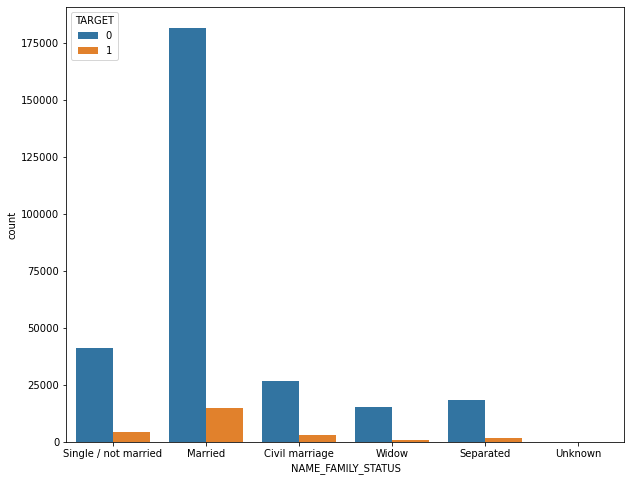

In [50]:
plt.figure(figsize = (10,8) )
sns.countplot(application['NAME_FAMILY_STATUS'],hue = application['TARGET'])

In [51]:
a = pd.DataFrame(application['TARGET'])
a['FAM'] = pd.DataFrame(application['NAME_FAMILY_STATUS'])
b2 = a[a['TARGET']==1]
defaulterSingle = b2[b2['FAM']== 'Single / not married']
defaulterMarried = b2[b2['FAM']=='Married']
defaulterCivil_marriage = b2[b2['FAM']=='Civil marriage']
defaulterWidow = b2[b2['FAM']=='Widow']
defaulterSeparated = b2[b2['FAM']=='Separated']
defaulterUnknown = b2[b2['FAM']=='Unknown']

print('Percentage of defaulter Single / not married : ',round((len(defaulterSingle)/len(b2))*100),'%')
print('Percentage of defaulter Married : ',round((len(defaulterMarried)/len(b2))*100),'%')
print('Percentage of defaulter Civil marriage : ',round((len(defaulterCivil_marriage)/len(b2))*100),'%')
print('Percentage of defaulter Widow : ',round((len(defaulterWidow)/len(b2))*100),'%')
print('Percentage of defaulter Separated : ',round((len(defaulterSeparated)/len(b2))*100),'%')
print('Percentage of defaulter Unknown : ',round((len(defaulterUnknown)/len(b2))*100),'%')


Percentage of defaulter Single / not married :  18 %
Percentage of defaulter Married :  60 %
Percentage of defaulter Civil marriage :  12 %
Percentage of defaulter Widow :  4 %
Percentage of defaulter Separated :  7 %
Percentage of defaulter Unknown :  0 %


- More amount of married people wants loan.
- Chances of default is more with Married people.

- HOUSING TYPE

<AxesSubplot:xlabel='NAME_HOUSING_TYPE', ylabel='count'>

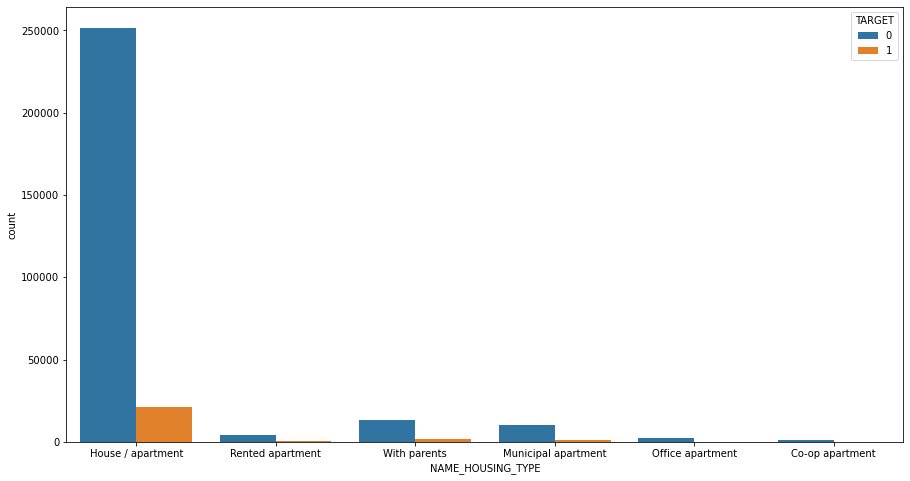

In [52]:
plt.figure(figsize = (15,8) )
sns.countplot(application['NAME_HOUSING_TYPE'],hue = application['TARGET'])

In [53]:
application['NAME_HOUSING_TYPE'].unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [54]:
a = pd.DataFrame(application['TARGET'])
a['HOU'] = pd.DataFrame(application['NAME_HOUSING_TYPE'])
b2 = a[a['TARGET']==1]
defaulterHouse = b2[b2['HOU']== 'House / apartment']
defaulterRENTED = b2[b2['HOU']=='Rented apartment']
defaulterWP = b2[b2['HOU']=='With parents']
defaulterMa = b2[b2['HOU']=='Municipal apartment']
defaulterOA = b2[b2['HOU']=='Office apartment']
defaulterCOA = b2[b2['HOU']=='Co-op apartment']


print('Percentage of defaulter House / apartment : ',round((len(defaulterHouse)/len(b2))*100),'%')
print('Percentage of defaulter Rented apartment : ',round((len(defaulterRENTED)/len(b2))*100),'%')
print('Percentage of defaulter With parents : ',round((len(defaulterWP)/len(b2))*100),'%')
print('Percentage of defaulter Municipal apartment : ',round((len(defaulterMa)/len(b2))*100),'%')
print('Percentage of defaulter Office apartment : ',round((len(defaulterOA)/len(b2))*100),'%')
print('Percentage of defaulter Co-op apartment : ',round((len(defaulterCOA)/len(b2))*100),'%')

Percentage of defaulter House / apartment :  86 %
Percentage of defaulter Rented apartment :  2 %
Percentage of defaulter With parents :  7 %
Percentage of defaulter Municipal apartment :  4 %
Percentage of defaulter Office apartment :  1 %
Percentage of defaulter Co-op apartment :  0 %


- Count of house/ apartment is the most.
- on Second position people living with there parents default more than any other category.
- people who owns house / apartment tend to default more

- OCCUPATION TYPE

<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='count'>

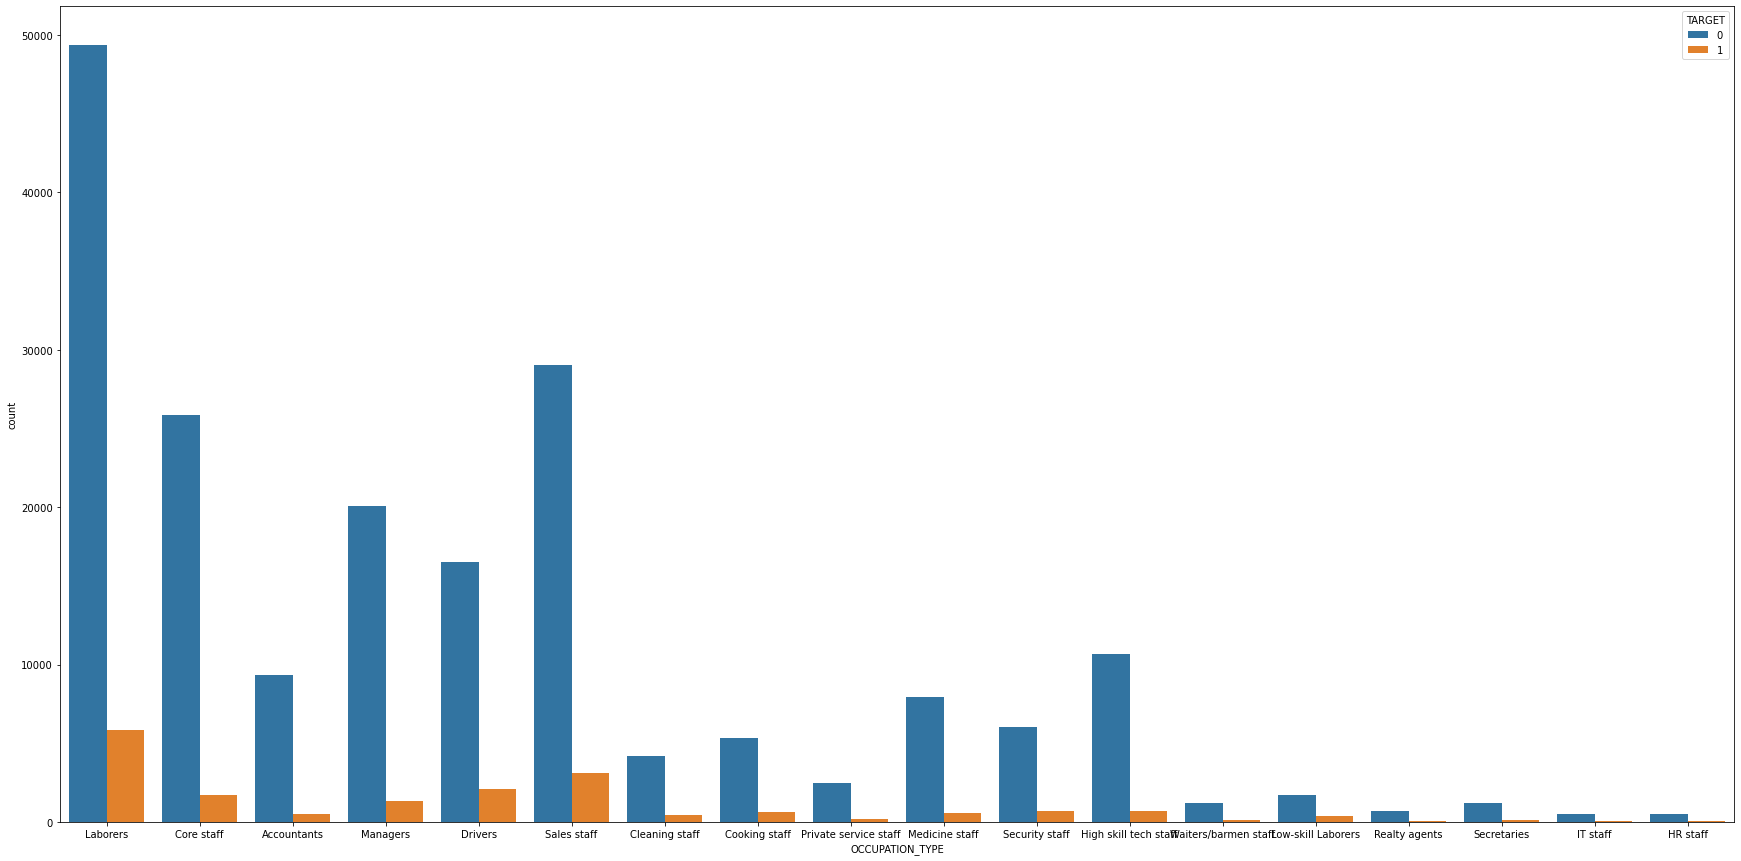

In [55]:
plt.figure(figsize = (30,15) )
sns.countplot(application['OCCUPATION_TYPE'],hue = application['TARGET'])

In [56]:
application['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [57]:
application.OCCUPATION_TYPE.fillna(value = 'Unknown',inplace = True)

In [58]:
application['OCCUPATION_TYPE'].isnull().sum()

0

In [59]:
a = pd.DataFrame(application['TARGET'])
a['OC'] = pd.DataFrame(application['OCCUPATION_TYPE'])
b2 = a[a['TARGET']==1]
defaulterA = b2[b2['OC']== 'Laborers']
defaulterB = b2[b2['OC']=='Core staff']
defaulterC = b2[b2['OC']=='Accountants']
defaulterD = b2[b2['OC']=='Managers']
defaulterE = b2[b2['OC']=='Unknown']
defaulterF = b2[b2['OC']=='Drivers']
defaulterG = b2[b2['OC']== 'Sales staff']
defaulterH = b2[b2['OC']=='Cleaning staff']
defaulterI = b2[b2['OC']=='Cooking staff']
defaulterJ = b2[b2['OC']=='Private service staff']
defaulterK = b2[b2['OC']=='Medicine staff']
defaulterL = b2[b2['OC']=='Security staff']
defaulterM = b2[b2['OC']== 'High skill tech staff']
defaulterN = b2[b2['OC']=='Waiters/barmen staff']
defaulterO = b2[b2['OC']=='Low-skill Laborers']
defaulterP = b2[b2['OC']=='Realty agents']
defaulterQ = b2[b2['OC']=='Secretaries']
defaulterR = b2[b2['OC']=='IT staff']
defaulterS = b2[b2['OC']=='HR staff']



print('Percentage of defaulter Laborers : ',round((len(defaulterA)/len(b2))*100),'%')
print('Percentage of defaulter Core staff : ',round((len(defaulterB)/len(b2))*100),'%')
print('Percentage of defaulter Accountants : ',round((len(defaulterC)/len(b2))*100),'%')
print('Percentage of defaulter Managers : ',round((len(defaulterD)/len(b2))*100),'%')
print('Percentage of defaulter Unknown : ',round((len(defaulterE)/len(b2))*100),'%')
print('Percentage of defaulter Drivers : ',round((len(defaulterF)/len(b2))*100),'%')
print('Percentage of defaulter Sales staff : ',round((len(defaulterG)/len(b2))*100),'%')
print('Percentage of defaulter Cleaning staff : ',round((len(defaulterH)/len(b2))*100),'%')
print('Percentage of defaulter Cooking staff : ',round((len(defaulterI)/len(b2))*100),'%')
print('Percentage of defaulter Private service staff : ',round((len(defaulterJ)/len(b2))*100),'%')
print('Percentage of defaulter Medicine staff : ',round((len(defaulterK)/len(b2))*100),'%')
print('Percentage of defaulter Security staff : ',round((len(defaulterL)/len(b2))*100),'%')
print('Percentage of defaulter High skill tech staff : ',round((len(defaulterM)/len(b2))*100),'%')
print('Percentage of defaulter Waiters/barmen staff : ',round((len(defaulterN)/len(b2))*100),'%')
print('Percentage of defaulter Low-skill Laborers : ',round((len(defaulterO)/len(b2))*100),'%')
print('Percentage of defaulter Realty agents : ',round((len(defaulterP)/len(b2))*100),'%')
print('Percentage of defaulter Secretaries : ',round((len(defaulterQ)/len(b2))*100),'%')
print('Percentage of defaulter IT staff : ',round((len(defaulterR)/len(b2))*100),'%')
print('Percentage of defaulter HR staff : ',round((len(defaulterS)/len(b2))*100),'%')

Percentage of defaulter Laborers :  24 %
Percentage of defaulter Core staff :  7 %
Percentage of defaulter Accountants :  2 %
Percentage of defaulter Managers :  5 %
Percentage of defaulter Unknown :  25 %
Percentage of defaulter Drivers :  8 %
Percentage of defaulter Sales staff :  12 %
Percentage of defaulter Cleaning staff :  2 %
Percentage of defaulter Cooking staff :  3 %
Percentage of defaulter Private service staff :  1 %
Percentage of defaulter Medicine staff :  2 %
Percentage of defaulter Security staff :  3 %
Percentage of defaulter High skill tech staff :  3 %
Percentage of defaulter Waiters/barmen staff :  1 %
Percentage of defaulter Low-skill Laborers :  1 %
Percentage of defaulter Realty agents :  0 %
Percentage of defaulter Secretaries :  0 %
Percentage of defaulter IT staff :  0 %
Percentage of defaulter HR staff :  0 %


- Unknown category ranks first. people might have forgotton to  fill this part as all nan values are replaced by unknown.
- laborers comes sencond most defaulter's category , might be due to delayed payment or less payment.

### Subtask 3.3.2 : Univariate numerical analysis

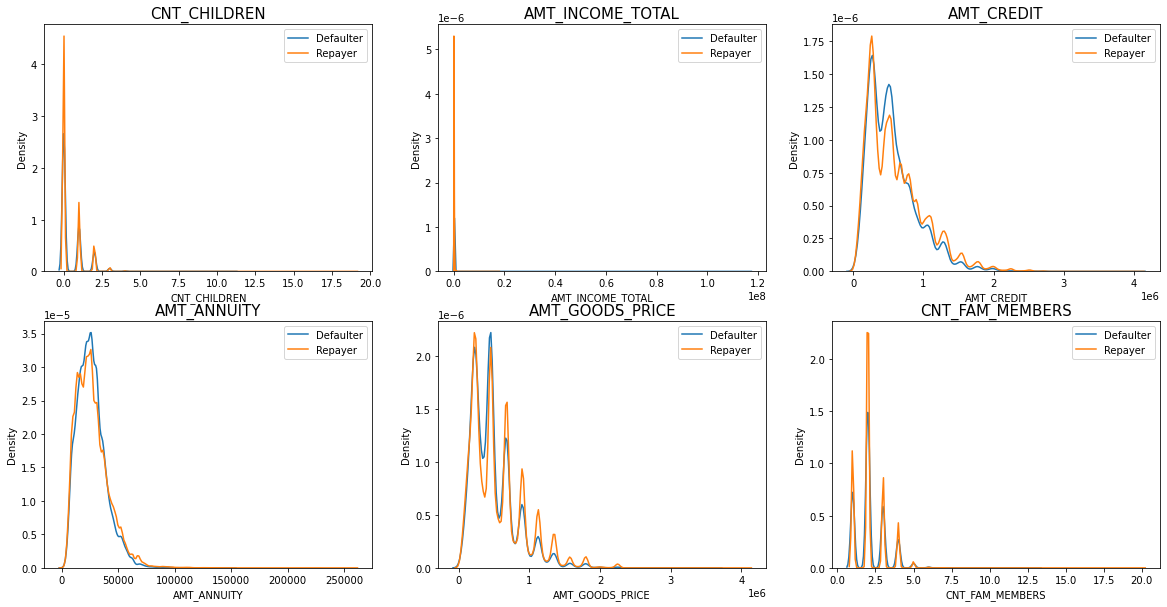

In [60]:
plt.figure(figsize = (20,10))
for i in enumerate(var_num):
    plt.subplot(2,3,i[0]+1)
    sns.distplot(defaulters[i[1]], hist=False,label ="Defaulter")
    sns.distplot(repayers[i[1]], hist=False, label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5})
    plt.legend()
    #sns.distplot(i[1], hist=False ,data = application)

- CNT_CHILDREN - Most of the data is distibuted between 0 to 3 children counts having most number of repayers.
- Amount income total - Data ranges from 0 to more than 5L. mostly concentrated on range 0 to 1L.
- Amount Credit - more number of defaulters within 1.15 to 1.75 density. 
- Amount Annuity -  Loan amount greater than 3.0 den and 0 to 50000 range have higher default rate than amount less than that.
- Amount good price - Defaulter and repayers are evenly distributed. 
- CNT_Family members - people with 1 to 6 family members tend to take loan than family members greater than that.
- The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision

### Subtask 3.3.3 : Segmented Analysis

In [61]:
# SEPERATED ALL COLUMNS WITH FLAG NAME IN IT AND GAVE VARIABLE NAME AS FLAG.

In [62]:
flag = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY','FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',]

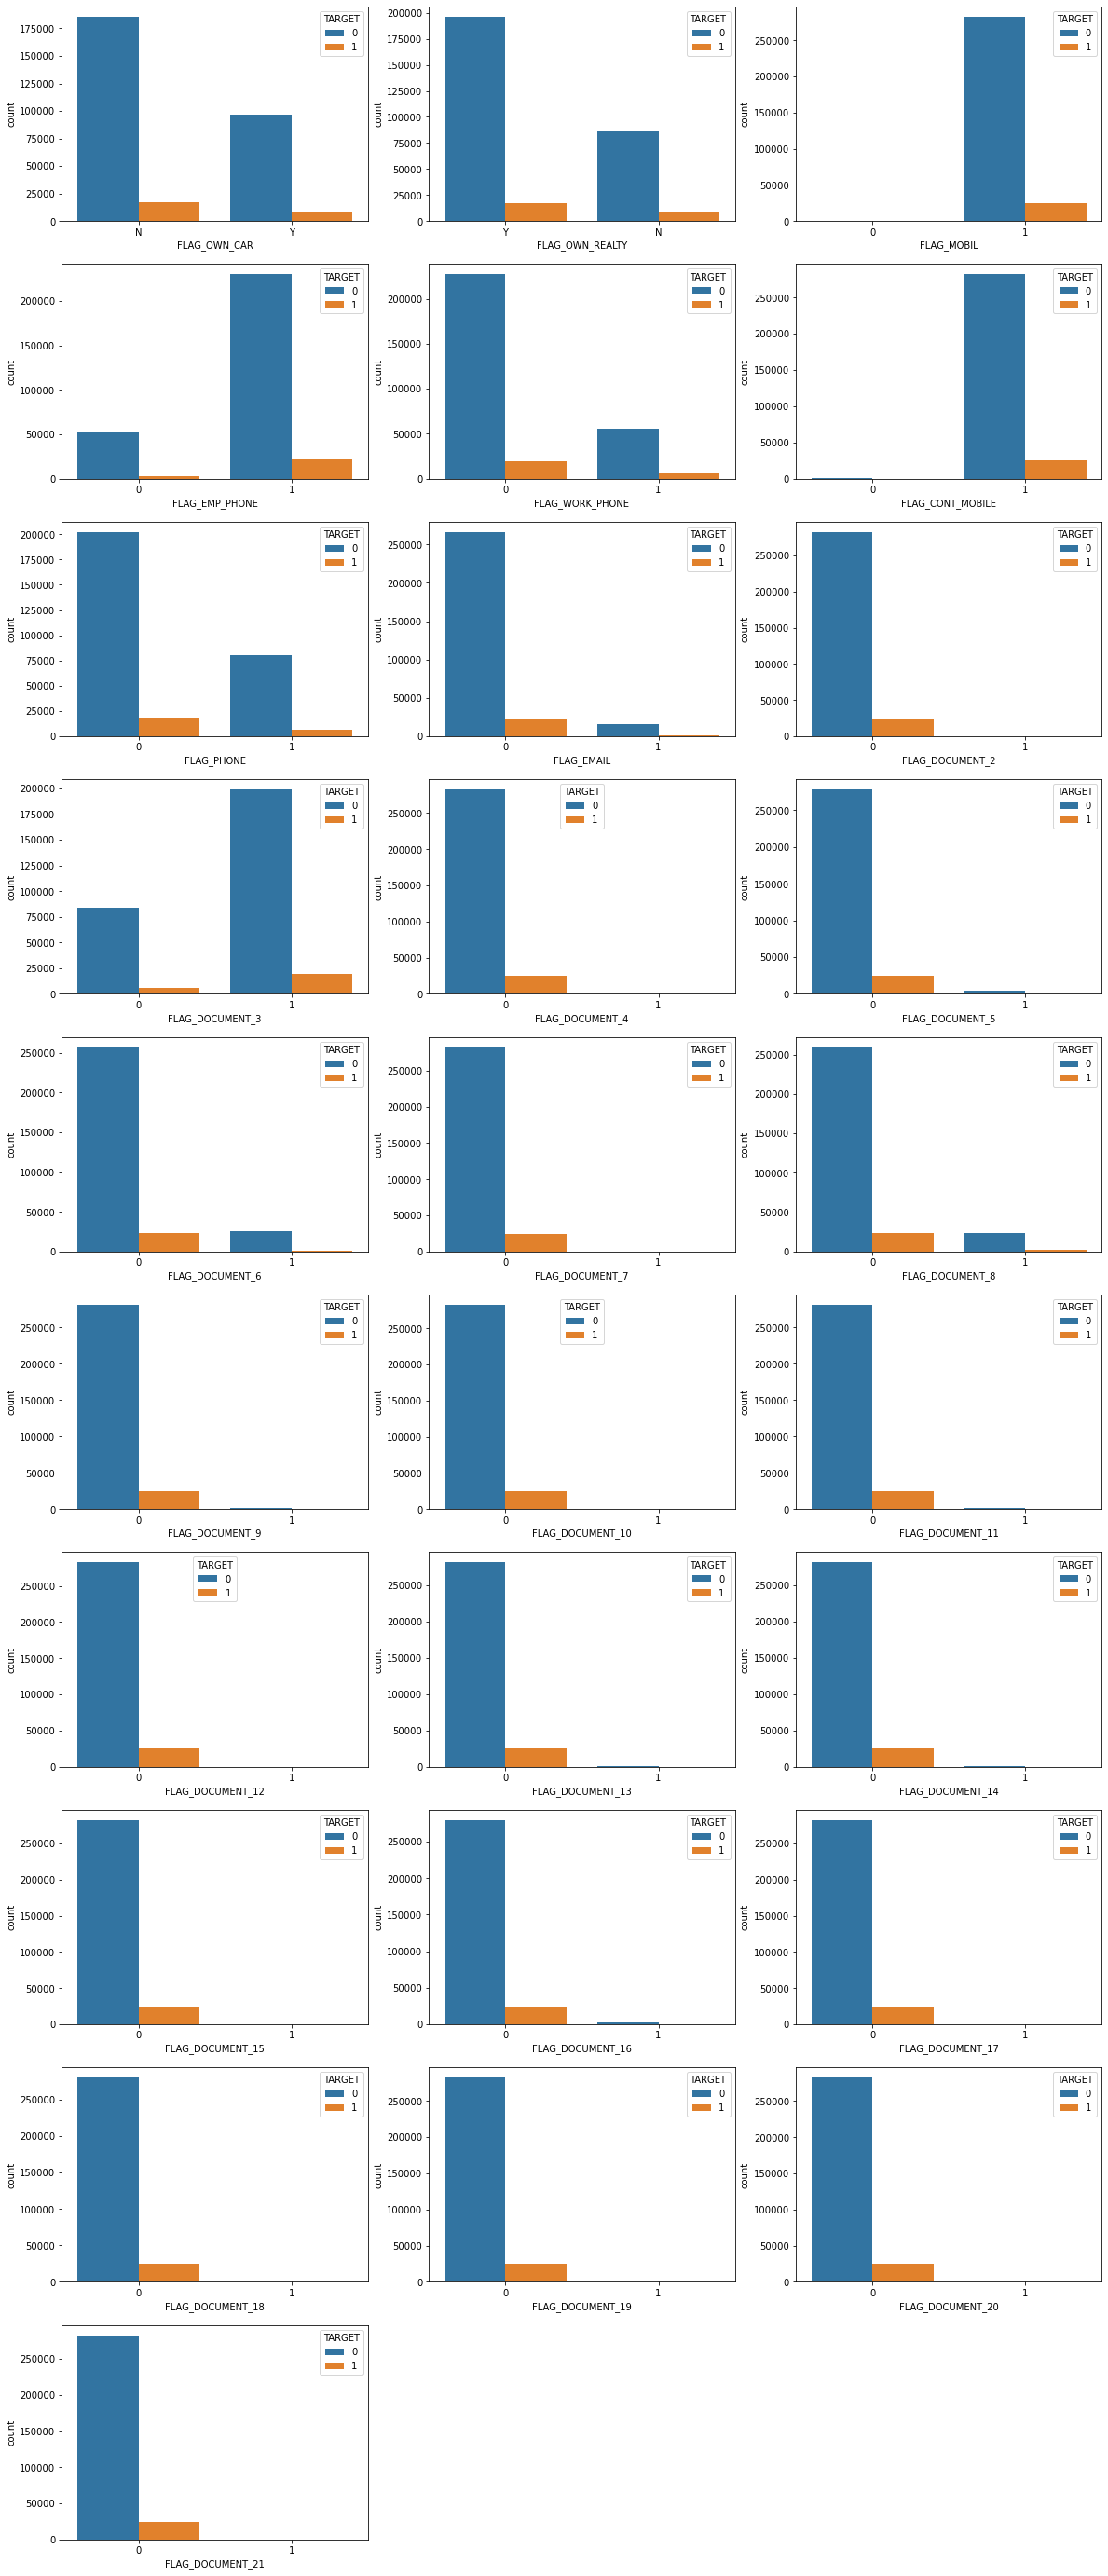

In [63]:
plt.figure(figsize = (20,50))
for i in enumerate(flag):
    plt.subplot(10,3,i[0]+1)
    sns.countplot(i[1], hue = 'TARGET' ,data = application)

- FLAG OWN CAR = People who dont have car default more than people who have.
- FLAG OWN REALTY = People who own real estate defaults more than people who dont.
- FLAG OWN EMP PHONE = People who own phone defaults more than people who dont.
- FLAG OWN PHONE/ EMAIL = People who doesnt own phone or email defaults more than people who dont.
- FLAG ALL DOCUMENTS - Many document are not submitted hence can not make a conclusion.

### Subtask 3.3.4 : Bivariate Numerical Analysis

In [64]:
def bivariate(x,y,df,labels):
    plt.figure(figsize = (10,10))
    sns.set_style('white')
    plt.figure(figsize=[15,15])
    sns.relplot(x=x, y=y, data=df, hue="TARGET",kind="line",legend = False)
    plt.legend(labels=labels)
    plt.xticks(rotation=0, ha='right')
    plt.show()

<Figure size 720x720 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

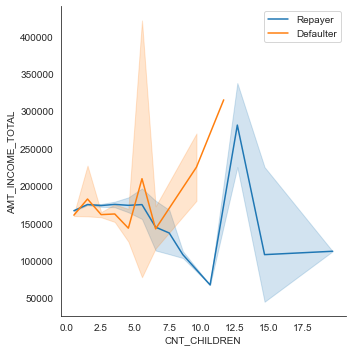

In [65]:
bivariate('CNT_CHILDREN','AMT_INCOME_TOTAL',application,['Repayer','Defaulter'])

- default rate between 7 to 13 chidren is more in income range 1L to 3L.

<Figure size 720x720 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

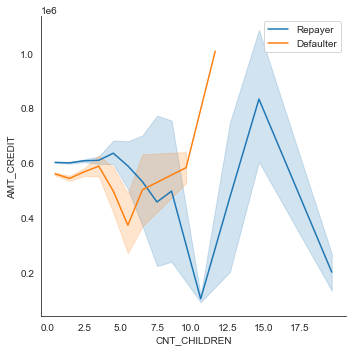

In [66]:
bivariate('CNT_CHILDREN','AMT_CREDIT',application,['Repayer','Defaulter'])

- default rate between 10 to 13 chidren is more in credit range 0.6e6 and 1e6.

<Figure size 720x720 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

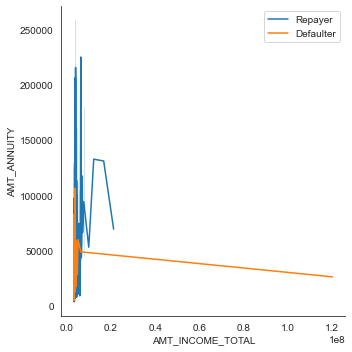

In [67]:
bivariate('AMT_INCOME_TOTAL','AMT_ANNUITY',application,['Repayer','Defaulter'])

- no repayer from income greater than 3000000 to 1200000.

<Figure size 720x720 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

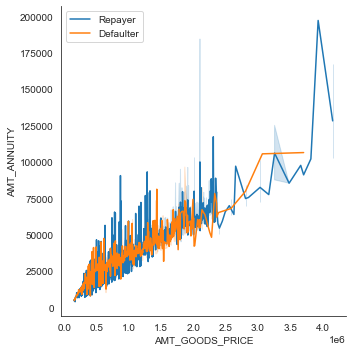

In [68]:
bivariate('AMT_GOODS_PRICE','AMT_ANNUITY',application,['Repayer','Defaulter'])

- Loan Amount(AMT_CREDIT) and Goods price(AMT_GOODS_PRICE) are highly correlated as based on the lineplot where most of the data are consolidated in form of a line

### Subtask 3.3.5 : Top 10 Correlation

In [69]:
# top 10 correlation for repayers column
corr_repayer = repayers.corr()
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df_repayer.columns =['col1','col2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,col1,col2,Correlation
802,FLAG_EMP_PHONE,DAYS_EMPLOYED,0.999758
1982,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998508
370,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
1239,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
1100,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
1487,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861
2044,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.859332
1673,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381
371,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
309,AMT_ANNUITY,AMT_CREDIT,0.771309


In [70]:
# top 10 correlation for defaulters column
corr_repayer = defaulters.corr()
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df_repayer.columns =['col1','col2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,col1,col2,Correlation
802,FLAG_EMP_PHONE,DAYS_EMPLOYED,0.999702
1982,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998269
370,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
1239,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.956637
1100,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
2044,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.868994
1487,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.847885
1673,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.778540
371,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
309,AMT_ANNUITY,AMT_CREDIT,0.752195


### Summary





A. Decisive Factor whether an applicant will be Repayer:
NAME_EDUCATION_TYPE: Academic degree has less defaults.
NAME_INCOME_TYPE: Student and Businessmen have no defaults.
AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default.
CNT_CHILDREN: People with zero to two children tend to repay the loans.


B. Decisive Factor whether an applicant will be Defaulter:
CODE_GENDER: Men are at relatively higher default rate even when the counts are less ,still acommodates for 43% default rate. 
NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot.
NAME_EDUCATION_TYPE: People with Secondary & Secondary education.
OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as their default rate is huge.
CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have children equal to or more than 9 default 100% and hence their applications are to be rejected.
AMT_GOODS_PRICE: When the credit amount goes beyond 3lakhs, there is an increase in defaulters.